# **Palmer Penguins**

***
![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png) 

This notebook contains my analysis of the famous Palmer Penguin dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and the raw data is available [here](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

**Author: Brianne McGrath**

***

# **Dataset Overview** 

***

The Palmer Penguin dataset contains information about penguins collected from the Palmer Archipelago (Antarctica). It contains various physical measurements and categorical attributes for each penguin, allowing for comprehensive analysis of penguin characteristics of specific species. 

##### **Key Insights:** 
- The dataset offers a variety of penguin species including Adelie, Chinstrap and Gentoo.
- Penguins are catagorised based on their sex, with male and female individuals represented in roughly equal numbers and the island in which they inhabitat including Torgersen, Biscoe and Dream. 
- Physical measurements provide detailed information about the characteristics of each penguin including flipper length, bill length, bill depth and body mass. 

##### **Data Quality:**
- The dataset appears to be well-structured, with consistent formatting and minimal missing values observed. 
- Missing values are mainly within the sex readings (11).

Overall, the Palmer penguin dataset offers a well-rounded collection of data, offering opportunites for comprehensive analysis.

***


# **Imports** 

*** 

Importing necessary libraries for analysis and visualisation. 

In [48]:
# Importing Necessary Libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

***

Load the palmer penguins dataset from a URL.

In [49]:
# Loading the Penguin Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# **Inspection of Data**

***

Inital inspection of dataset. 

In [50]:
# Reviewing Dataset
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [51]:
#Spot Checking Data
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
251,Gentoo,Biscoe,42.8,14.2,209.0,4700.0,FEMALE
256,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,FEMALE
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,MALE
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,FEMALE
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE


In [52]:
# Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [53]:
# Showing Summary Statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [54]:
#Checking for Columns with Missing Values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [55]:
# Count the Number of Penguins of Each Sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [56]:
# Count the Number of Penguins in Each Species
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [57]:
# Count the Number of Penguins in Each Island
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [58]:
#Frequency Table
df[["species", "island", "sex"]].value_counts().reset_index(name="count")

,species,island,sex,count
0,Gentoo,Biscoe,MALE,61
1,Gentoo,Biscoe,FEMALE,58
2,Chinstrap,Dream,FEMALE,34
3,Chinstrap,Dream,MALE,34
4,Adelie,Dream,MALE,28
5,Adelie,Dream,FEMALE,27
6,Adelie,Torgersen,FEMALE,24
7,Adelie,Torgersen,MALE,23
8,Adelie,Biscoe,FEMALE,22
9,Adelie,Biscoe,MALE,22


***

# **Analysis:**

***

#### **Types of Variables:**

Upon reviewing the dataset, we have identified two types of variables that I believe will be beneficial for our analysis:

- **Numeric Variables:** These include measurements such as bill length, bill depth, flipper length, and body mass. These measurements provide detailed insights into each penguin's physical characteristics. We chose these types of variable as they give us exact measurements for the physical attributes of the penguins. Analysing numerical values allows us to understand the relationships or correlations between different characteristics in an exact and percise manner.

- **Categorical Variables:** The dataset includes categorical attributes such as species, island and sex. With three distinct species, islands and two sexes represented, these attributes enable comprehensive analysis and comparison across different groups of penguins. Analyising categorical variables allows us to explore similarites and between groups. We can find patterns or variations that may exist within these categories.

Our analysis will primarily focus on these two types of variables. The numeric values offering rich information, providing detailed insights into the dataset. Additionally, the categorical variables allow for further exploration based on sex, islands and species, enhancing the depth of our analysis.


## **Bar Charts:**

***

##### **Count of Penguins by Species:**

The Bar Chart below shows the distribution of penguins across different species in the dataset. 
- Adelie penguins are the most abundant species (152).
- Gentoo have a slightly smaller count (124). 
- Chinstrap penguins are the least represented (68). 

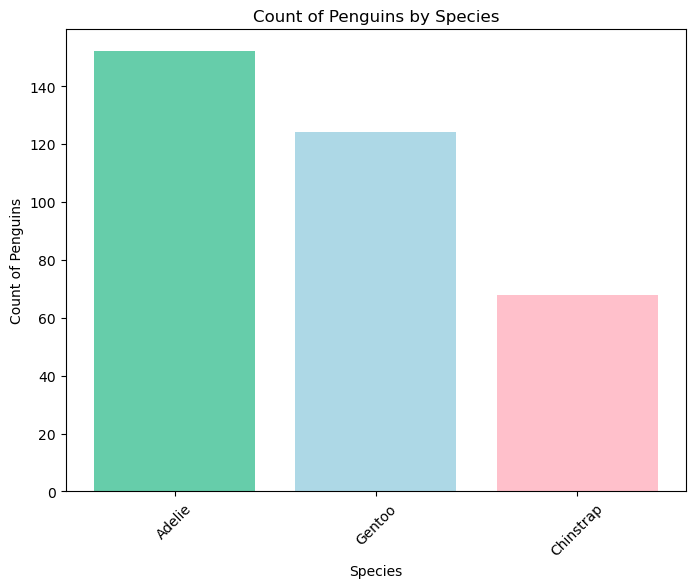

In [59]:
# Count of Penguins by Species
penguins_count_by_species = df['species'].value_counts()

# Colours for Different Species

colours=['mediumaquamarine', 'lightblue', 'pink']

# Creating Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(penguins_count_by_species.index, penguins_count_by_species.values, color=colours)
plt.title('Count of Penguins by Species')
plt.xlabel('Species')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

#### **Count of Penguins by Sex:**

The Bar Chart shows the distribution of penguins based on their sex. We can see that both Males and Females are represented in roughly equal numbers. 

- Male (168)
- Female (165)

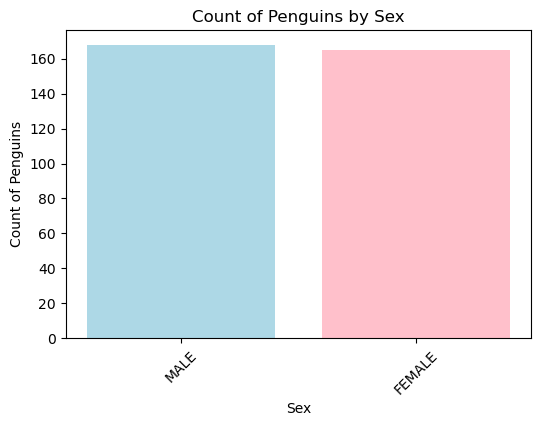

In [60]:
# Count of Penguins by Sex
penguins_count_by_sex = df['sex'].value_counts()

#Colours for Male and Female
colours = ['lightblue', 'pink']
# Creating Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(penguins_count_by_sex.index, penguins_count_by_sex.values, color=colours)
plt.title('Count of Penguins by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

#### **Count of Penguins by Island:**

The Bar Chart shows the distribution of penguins based on the island they inhabitat. 

- Biscoe (168)
- Dream (124)
- Torgersen (52)

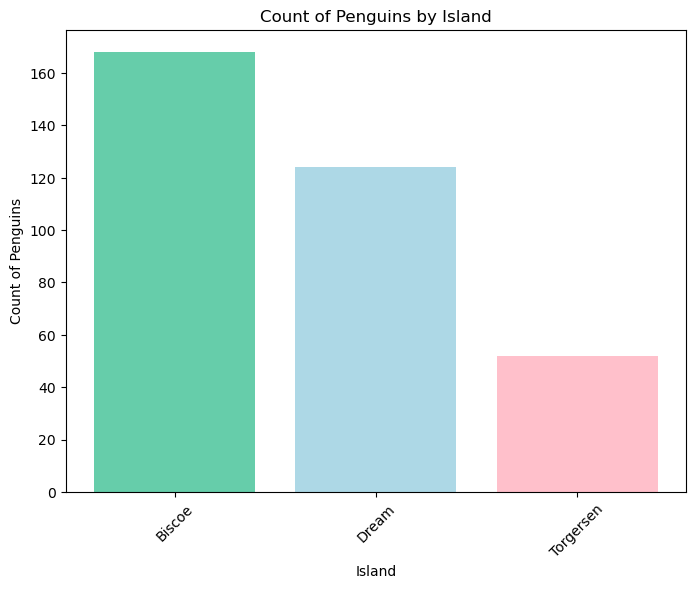

In [61]:
#Count of Penguins by Island
penguins_count_by_island = df['island'].value_counts()

#Colours for Biscoe, Dream, Torgersen 
colours=['mediumaquamarine', 'lightblue', 'pink']

#Creating Bar Chart
plt.figure(figsize=(8,6))
plt.bar(penguins_count_by_island.index, penguins_count_by_island.values, color=colours)
plt.title('Count of Penguins by Island')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.xticks(rotation=45)
plt.show()

# Histograms

****

We will look at the distribution over the four variables we intend to analyse: 

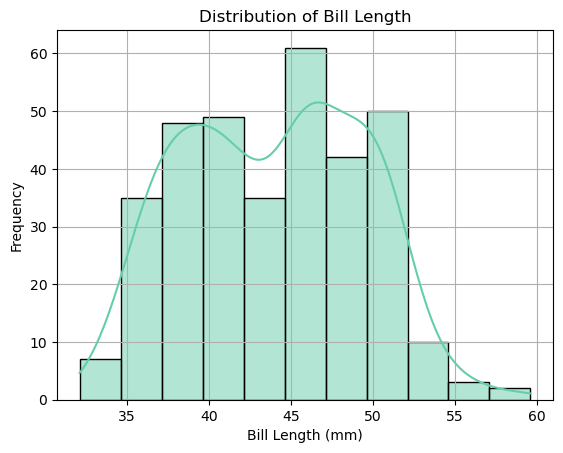

In [62]:
# Histogram - Bill Length
sns.histplot(df['bill_length_mm'], kde=True, color='mediumaquamarine')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


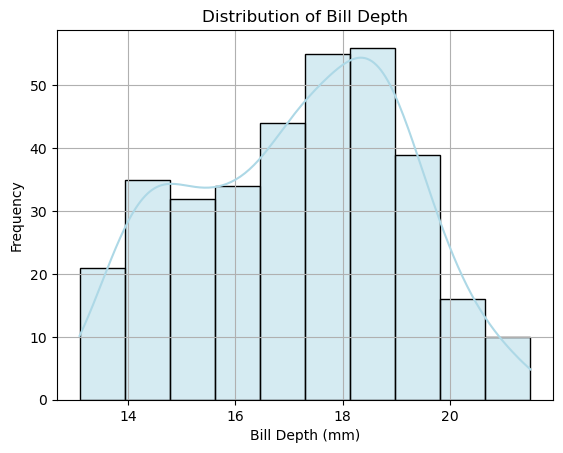

In [63]:
# Histogram - Bill Depth
sns.histplot(df['bill_depth_mm'], kde=True, color='lightblue')
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


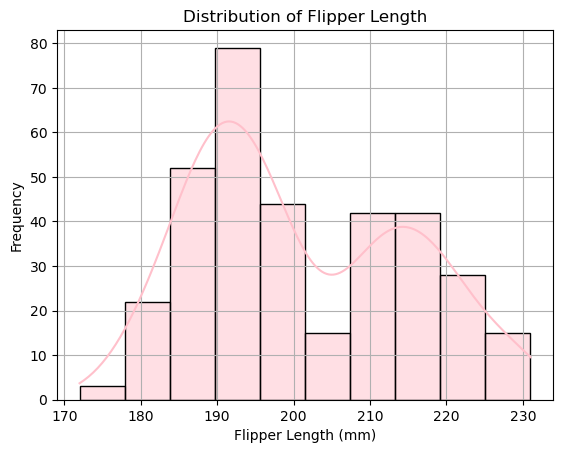

In [64]:
# Histogram - Flipper Length
sns.histplot(df['flipper_length_mm'], kde=True, color='pink')
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

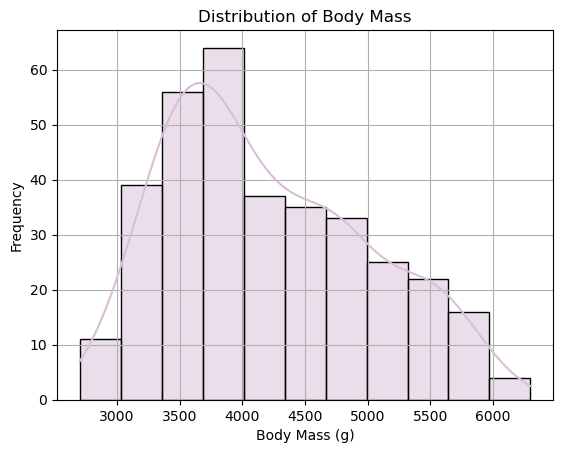

In [65]:

# Histogram - Body Mass
sns.histplot(df['body_mass_g'], kde=True, color='thistle')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Let's see how the distribution looks when we filter by Species. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


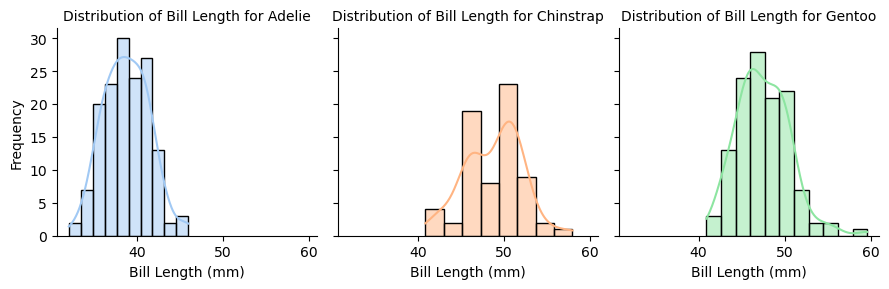

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


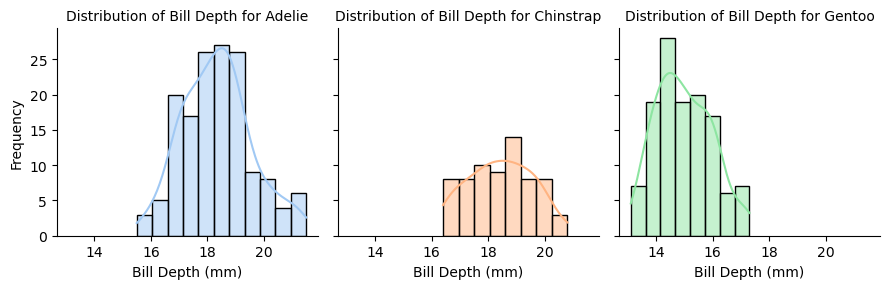

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


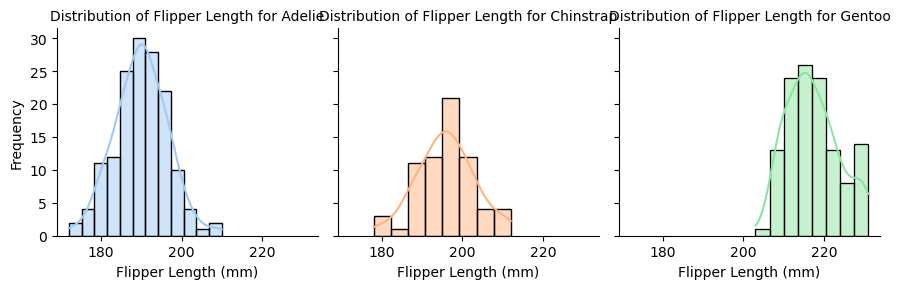

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


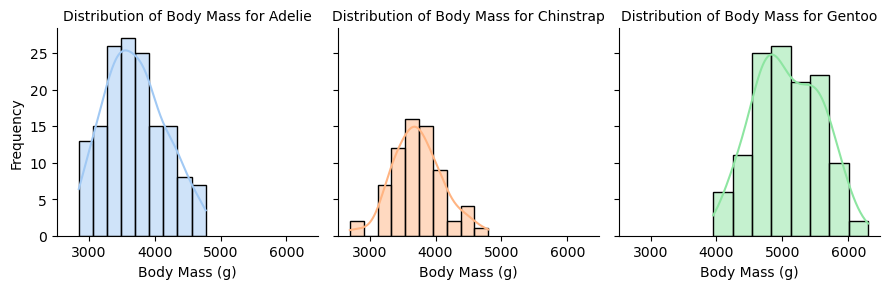

In [79]:
# Create separate Histograms for Bill Length by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "bill_length_mm", kde=True).set_titles("Distribution of Bill Length for {col_name}").set_axis_labels("Bill Length (mm)", "Frequency")
plt.show()

# Create separate Histograms for Bill Depth by species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "bill_depth_mm", kde=True).set_titles("Distribution of Bill Depth for {col_name}").set_axis_labels("Bill Depth (mm)", "Frequency")
plt.show()

# Create separate Histograms for Flipper Length by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "flipper_length_mm", kde=True).set_titles("Distribution of Flipper Length for {col_name}").set_axis_labels("Flipper Length (mm)", "Frequency")
plt.show()

# Create separate Histograms for Body Mass by Species
sns.FacetGrid(df, col="species", hue="species", palette="pastel").map(sns.histplot, "body_mass_g", kde=True).set_titles("Distribution of Body Mass for {col_name}").set_axis_labels("Body Mass (g)", "Frequency")
plt.show()


***

# **Correlation Analysis: Examing Relationships Between Variables**

***

### **Bill Length vs Bill Depth:**

Let's begin the correlation anlysis by calculating Pearson coorelation coefficient and also creating a Scatter Plot to visualise.

In [67]:
# Calculate Pearson correlation coefficient
correlation = df['bill_length_mm'].corr(df['bill_depth_mm'])

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: -0.23505287035553268


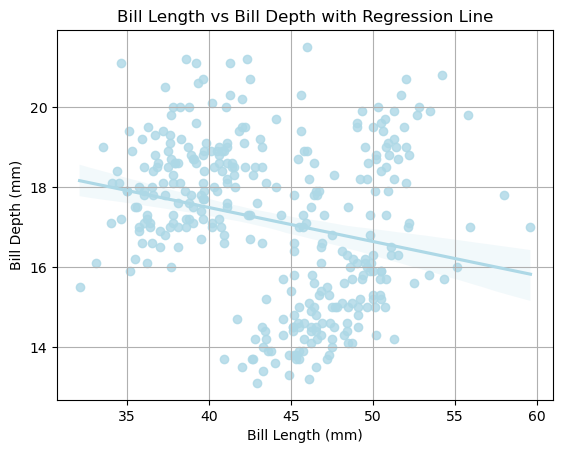

In [82]:
#Scatter Plot with Regression Line for Bill Length and Depth 
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='lightblue')
plt.title('Bill Length vs Bill Depth with Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

We can see that from the above, there is a negative correlation between Bill Length and Bill Depth. However, the scattered spread of points around the regression line suggests a weaker correlation. Let's examine the relationship separately for each species - to see if this will have an affect on the correlation. 

In [91]:
# Calculate Pearson correlation coefficient for Adelie penguins
adelie_correlation = df[df['species'] == 'Adelie']['bill_length_mm'].corr(df[df['species'] == 'Adelie']['bill_depth_mm'])

# Calculate Pearson correlation coefficient for Chinstrap penguins
chinstrap_correlation = df[df['species'] == 'Chinstrap']['bill_length_mm'].corr(df[df['species'] == 'Chinstrap']['bill_depth_mm'])

# Calculate Pearson correlation coefficient for Gentoo penguins
gentoo_correlation = df[df['species'] == 'Gentoo']['bill_length_mm'].corr(df[df['species'] == 'Gentoo']['bill_depth_mm'])

# Print the correlation coefficients
print("Pearson correlation coefficient for Adelie penguins:", adelie_correlation)
print("Pearson correlation coefficient for Chinstrap penguins:", chinstrap_correlation)
print("Pearson correlation coefficient for Gentoo penguins:", gentoo_correlation)


Pearson correlation coefficient for Adelie penguins: 0.3914916918358763
Pearson correlation coefficient for Chinstrap penguins: 0.6535362081800428
Pearson correlation coefficient for Gentoo penguins: 0.6433839465253381


We now see that there is a positve correlation betwen these variables when we are looking at the data per species. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


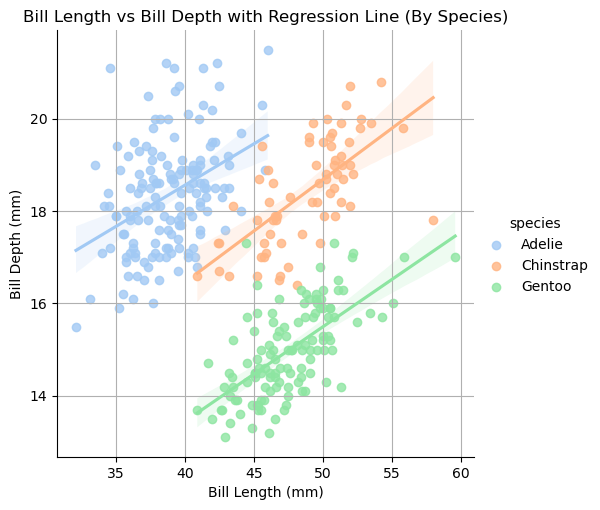

In [85]:
# lmplot separated by Species
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', palette='pastel')
plt.title('Bill Length vs Bill Depth with Regression Line (By Species)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

Let's look a bit deeper and review by Sex.

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


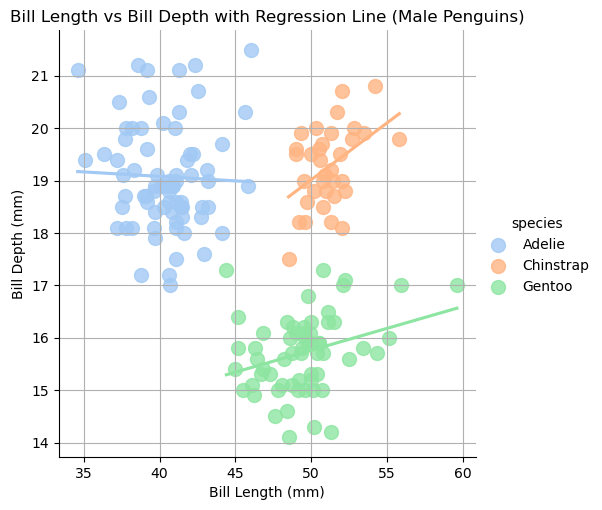

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


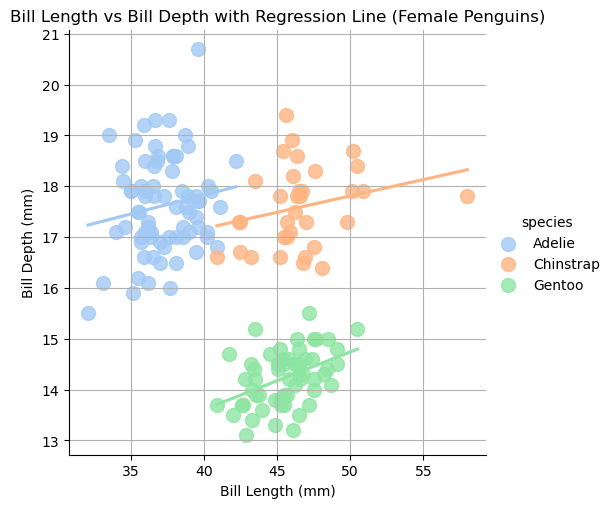

In [84]:
# Filter by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=male_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Male Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=female_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Female Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

***

#### **Flipper Length vs Body Mass: Positive**

In [69]:
# Calculate Pearson correlation coefficient
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.8712017673060114


Initially, it appears there is a positive correlation between these two variables. Let's see if there are any changes when we look at this by Sex. 

In [70]:
#Checking if Correlation changes based on Sex:

# Calculate Pearson correlation coefficient for male penguins
male_correlation = df[df['sex'] == 'MALE']['flipper_length_mm'].corr(df[df['sex'] == 'MALE']['body_mass_g'])

# Calculate Pearson correlation coefficient for female penguins
female_correlation = df[df['sex'] == 'FEMALE']['flipper_length_mm'].corr(df[df['sex'] == 'FEMALE']['body_mass_g'])

# Print the correlation coefficients
print("Pearson correlation coefficient for male penguins:", male_correlation)
print("Pearson correlation coefficient for female penguins:", female_correlation)


Pearson correlation coefficient for male penguins: 0.8654986521055599
Pearson correlation coefficient for female penguins: 0.8848249756326789


Again, we see a positive correlation between the two variables. 



Based on the analysis above, it's evident that male penguins generally exhibit larger Bill Length and Depth compared to female penguins. Across all species, there is a positive correlation between the two variables, except for male Adelie penguins, which show a slight negative correlation. 

### Flipper Length vs Body Mass (NOT NECESSARY TO DO TWO SETS OF VARIABLES - WILL WE REMOVE THIS?)

***

Let's see if there is any correlation between Flipper Length and Body Mass: 

We can see from the below graph that there seems to be a strong positive correlation between these two variables. This is confirmed when we add the regression line to the graph also. Let's have a look by digging deeper into each species and the two sex variables if this relationship still stands. 

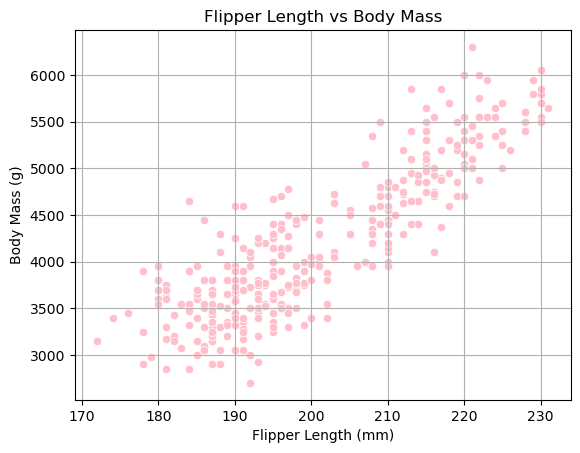

In [74]:
#Scatter plot for Flipper Length and Body MAss - to assess if there's correlation between the two
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, color='pink')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

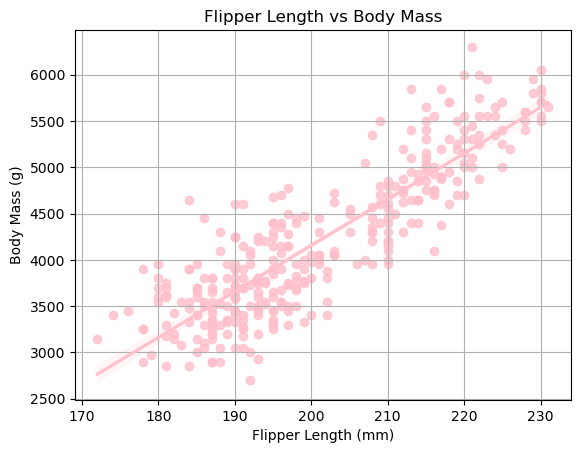

In [75]:
#Adding Regression Line for the same variables. 
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df, color='pink')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


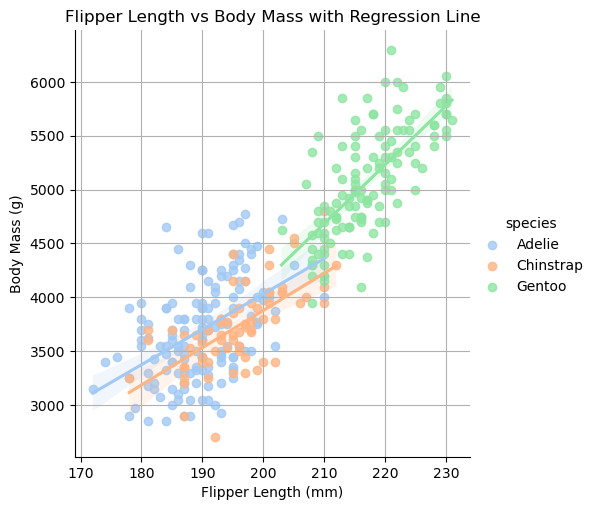

In [76]:
# lmplot separated by Species
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species', palette='pastel')
plt.title('Flipper Length vs Body Mass with Regression Line')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

#### Female Vs Male: Flipper Length vs Body Mass

***

Let's compare the relationship between Flipper Length and Body Mass for Male and Female penguins. We'll analyse seperate scatter plots for males and females to discern any difference in correlation between these variables based on sex, identicial to the analysis we did regarding Bill Length and Bill Depth. 

Our aim once again, is to understand if there are distinct patterns between these two variables across the two sexes. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


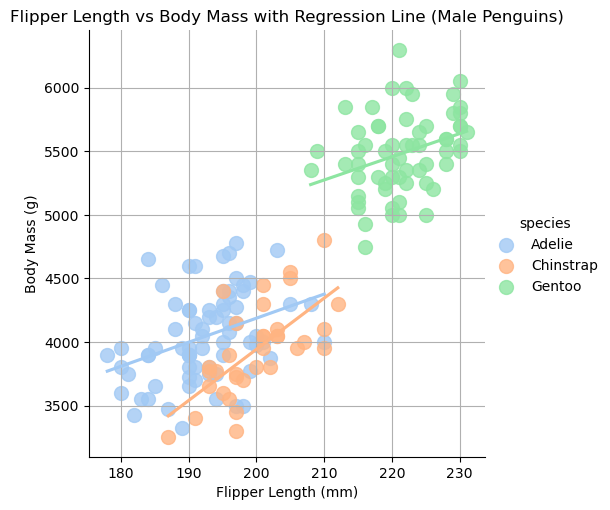

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


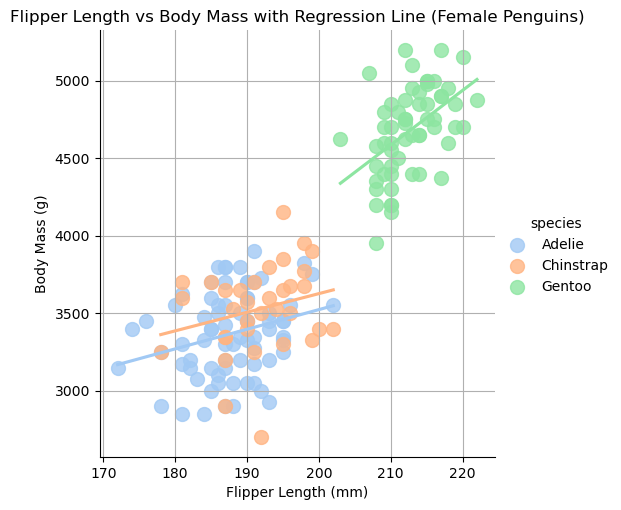

In [77]:
# Filter the Dataframe by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=male_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Male Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=female_df, hue='species', palette='pastel', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Female Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

Based on the analysis above, it's evident once again that male penguins generally exhibit larger readings for the respective variables compared to the females. Across all species and sexes there is a positive correlation for these variables. 

# **Conclusion:** 

***

In summary our analysis of the relationship between Bill Length vs Bill Depth and Flipper Length vs Body Mass among penguins has yielded key observations: 

- Variability in Correlation: Initially the scattered spread of points around the regression line suggested a weaker correlation between Bill Length and Bill Depth. However, upon investigating the relationship separately for each penguin species, we discovered a consistent positive correlation across all species. The only variation we found was when we looked at the correlation based on sex where we found Males of the Adelie species to have a slight negative correlation. 

- Sexual Variation: 

- Confirmation of Positive Correlation: 

***

### End